<a href="https://colab.research.google.com/github/Karenfonseca22/Airbnb-Business-Intelligence/blob/main/Airbnb_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pasar archivo .csv a jason y luego subirlo a BigQuery

In [ ]:
from google.colab import files

# Esto te permitirá subir el archivo CSV desde tu computadora a Colab
uploaded = files.upload()

Saving hosts.csv to hosts.csv


In [ ]:
from google.colab import files

# Esto te permitirá subir el archivo CSV desde tu computadora a Colab
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [ ]:
from google.colab import files

# Esto te permitirá subir el archivo CSV desde tu computadora a Colab
uploaded = files.upload()

Saving rooms.csv to rooms.csv


Pasar de .csv a .json (tabla hosts)

In [ ]:
import pandas as pd

# Cargar el archivo CSV
csv_file_path = 'hosts.csv'
df = pd.read_csv(csv_file_path)

# Guardar el DataFrame como JSON en formato de líneas
json_file_path = 'hosts.json'
df.to_json(json_file_path, orient='records', lines=True)

print(f'Archivo JSON guardado en: {json_file_path}')

Archivo JSON guardado en: hosts.json


In [ ]:
import pandas as pd

# Convertir el archivo reviews.csv a JSON
csv_file_path_reviews = 'reviews.csv'
json_file_path_reviews = 'reviews.json'
df_reviews = pd.read_csv(csv_file_path_reviews)
df_reviews.to_json(json_file_path_reviews, orient='records', lines=True)
print(f'Archivo JSON guardado en: {json_file_path_reviews}')

# Convertir el archivo rooms.csv a JSON
csv_file_path_rooms = 'rooms.csv'
json_file_path_rooms = 'rooms.json'
df_rooms = pd.read_csv(csv_file_path_rooms)
df_rooms.to_json(json_file_path_rooms, orient='records', lines=True)
print(f'Archivo JSON guardado en: {json_file_path_rooms}')

Archivo JSON guardado en: reviews.json
Archivo JSON guardado en: rooms.json


CONECTAR MIS TABLAS DE BIGQUERY

In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client pandas-gbq

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reemplaza con tu ID de proyecto y el nombre de la tabla
project_id = 'airbnb-436116'  # Asegúrate de que este sea tu ID de proyecto real
dataset_id = 'alojamiento'  # Nombre del conjunto de datos
table_id_1 = 'reviews_cr'  # Nombre de la tabla 1

# Consulta SQL para seleccionar los datos de la tabla
query1 = f'SELECT * FROM `{project_id}.{dataset_id}.{table_id_1}`'  # Corrección en la construcción de la consulta


df_reviews_cr = pd.read_gbq(query1, project_id = project_id)
# Mostrar las primeras filas del DataFrame
display(df_reviews_cr)

,id,host_id,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,647520,3245431,234,29,2019-04-30,0.37,1,302.0
1,22753775,168044240,265,42,2019-06-07,2.45,1,70.0
2,4479632,20431437,495,159,2019-06-12,2.83,1,129.0
3,11920660,62316222,595,51,2019-06-06,1.29,1,347.0
4,13309763,75098888,450,41,2019-04-19,1.16,1,0.0
...,...,...,...,...,...,...,...,...
48705,20319662,17555570,72,92,2019-07-07,3.99,12,102.0
48706,34490377,260639745,100,4,2019-07-07,4.00,15,359.0
48707,21824124,159091490,139,82,2019-07-07,4.16,17,355.0
48708,21933969,159091490,129,32,2019-07-07,1.62,17,363.0


**Histograma para reviews_per_month**

Esto es para mirar su distribución y ver si se imputa por mediana o promedio

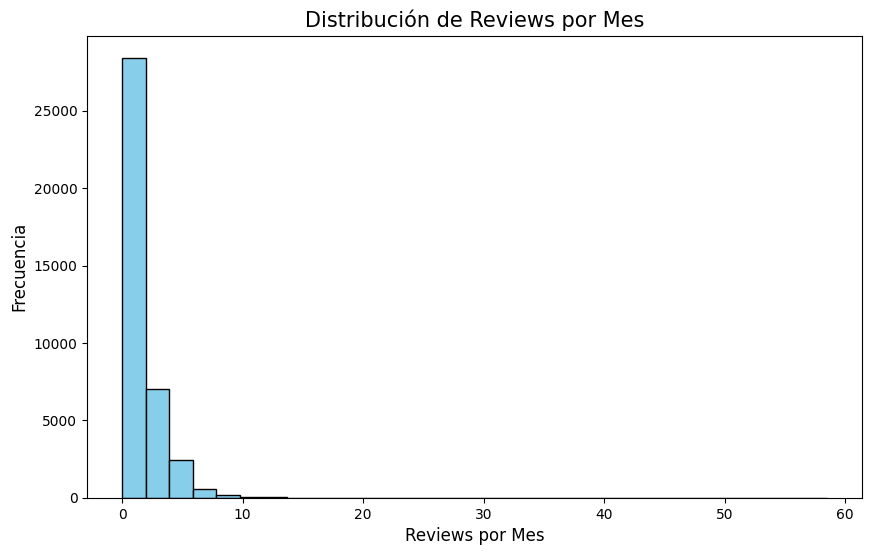

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_reviews_cr['reviews_per_month'], bins=30, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Reviews por Mes', fontsize=15)
plt.xlabel('Reviews por Mes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el histograma
plt.show()


Conclusión de grafica, con esta distribución no normal, lo mejor es imputar por la mediana

In [ ]:
# Calcular la mediana de la columna 'reviews_per_month'
mediana_reviews = df_reviews_cr['reviews_per_month'].median()

# Mostrar la mediana
print(f"La mediana de reviews por mes es: {mediana_reviews}")


La mediana de reviews por mes es: 0.71
